# Why does my tummy hurt?
My tummy hurts after a lot of meals, sometimes my eyes go blurry. What is that about?
Do you want to find out? Please enjoy my open-source tummy data.

Symptom data rates on a scale of 1 to 5 being not present to unbearable.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot styles
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 22,
                    'figure.figsize':(24,8)})

# set seaborn style
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.5)

# create UKDS color palette
# colors = ['#E03A6C', '#F5AD42', '#6C2B76']
colors = ['#E03A6C', '#F5AD42', '#ECE64B', '#449858', '#43A6C6', '#6C2B76']

# use n_colors to allow the colors to cycle
palette = sns.set_palette(sns.color_palette(colors), n_colors=100)

In [52]:
data = pd.read_csv('tummyData.csv')
data.head()

,Timestamp,Todays Date,What did you eat,How much did you like it?,Allergen,Back pain,Headache,Sleep,Breathing,Bloated,Stomach Pain,Poop,Vision
0,08/10/2021 23:19:19,08/10/2021,Egg and Spicy Cheese bread,NaN,"Starch, Dairy, Onions, Spice, Caffeine, Egg",1,1,1,1,5,5,5.0,1
1,08/10/2021 23:21:58,08/10/2021,Tom Yum and fried potatoes,NaN,"Onions, Spice",1,1,1,1,1,1,1.0,1
2,08/10/2021 23:22:54,08/10/2021,Cheese rice and Lentil Dahl,NaN,"Starch, Dairy, Onions, Spice, Tomato",1,1,1,1,3,3,1.0,3
3,08/10/2021 23:23:23,08/10/2021,Popcorn,NaN,Starch,1,2,1,1,3,3,1.0,3
4,09/10/2021 12:36:25,09/10/2021,Dahl and cheese rice,NaN,"Starch, Dairy, Onions, Spice, Tomato",2,2,1,1,3,3,1.0,1


So to start with let's keep it simple. Let's find my favorite, and least favorite meal over this period.

# Do I even like what I eat?

<AxesSubplot:>

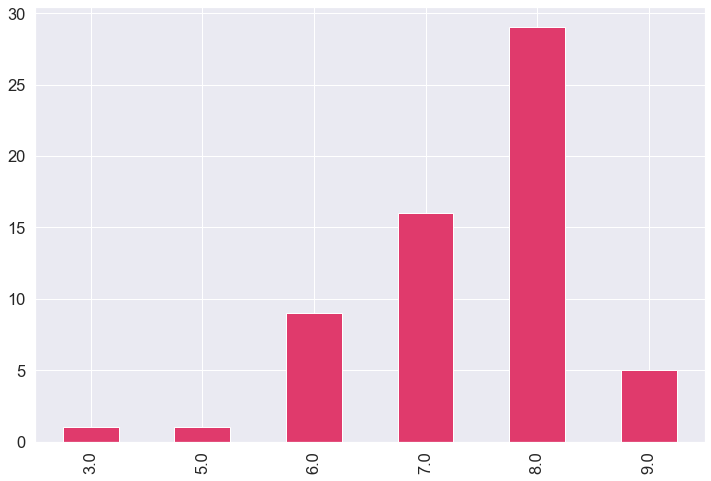

In [53]:
data['How much did you like it?'].value_counts().sort_index().plot(kind='bar')

It seems like I enjoy most of my meals! What were they?
What were the best meals?

## The best meals

In [54]:
data.nlargest(3,'How much did you like it?')

,Timestamp,Todays Date,What did you eat,How much did you like it?,Allergen,Back pain,Headache,Sleep,Breathing,Bloated,Stomach Pain,Poop,Vision
5,10/10/2021 17:08:39,09/10/2021,Cornish Pasty chips and beer,9.0,"Starch - breads and grains, Onions",1,1,1,2,3,3,2.0,1
26,24/10/2021 13:44:10,23/10/2021,Chicken pizza and kinder bueno cupcake,9.0,"Starch - breads and grains, Dairy, Onions, Tom...",3,2,5,2,4,4,2.0,3
29,24/10/2021 21:07:29,24/10/2021,Chicken Rice,9.0,"Starch - breads and grains, Spice, Sugar",1,1,2,1,2,2,1.0,2


So my top three meals over this period were:
* Cornish pasty, chips and beer
* Chicken pizza and a kinder bueno cupcake
* Chicken rice

Before anybody implies that they think my tummy hurts because of my bad diet, STOP!
Yes these things may have made my tummy hurt a little.
Let's look at the worst meals.

## The worst meals

In [55]:
data.nsmallest(3,'How much did you like it?')

,Timestamp,Todays Date,What did you eat,How much did you like it?,Allergen,Back pain,Headache,Sleep,Breathing,Bloated,Stomach Pain,Poop,Vision
24,23/10/2021 20:56:08,23/10/2021,Potatoes,3.0,Starch - breads and grains,1,1,4,2,2,2,2.0,1
44,09/11/2021 13:28:10,09/11/2021,butternut squash soup,5.0,"Starch - breads and grains, Dairy, Onions, Spice",1,1,2,1,3,2,1.0,1
7,10/10/2021 17:10:02,09/10/2021,Chicken Burger chips and Dr Pepper,6.0,"Starch - breads and grains, Dairy, Caffeine",1,1,1,1,3,2,1.0,1


My worst meals of the month was a potato and ome butternut squash soup. Even those gave me a small amount of tummy pain.

So I actually rated all my meals over 5 for the entire period, minus these two. I "liked" 97% of what I ate.

# Allergens
On my hunch that this is some sort of allergy or intolerance to something, I tracked some of the common food intolerances. These are stored as comma seperated values so we need a way to unapck these to analyse them properly.

In [56]:
allergens = (data.Allergen.str.split('\s*,\s*', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))

allergens.head()

/var/folders/k6/5jfk6t556clfdbn2jmpzglh80000gn/T/ipykernel_3056/1456836646.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  allergens = (data.Allergen.str.split('\s*,\s*', expand=True)


,Caffeine,Citrus,Dairy,Egg,Onions,Spice,Starch,Starch - breads and grains,Sugar,Tomato
0,1,0,1,1,1,1,1,0,0,0
1,0,0,0,0,1,1,0,0,0,0
2,0,0,1,0,1,1,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,1,1,0,0,1


In [57]:
# then we concat this onto our orrignal data
data = pd.concat([data, allergens], axis=1).reindex(data.index)
data.head()

,Timestamp,Todays Date,What did you eat,How much did you like it?,Allergen,Back pain,Headache,Sleep,Breathing,Bloated,...,Caffeine,Citrus,Dairy,Egg,Onions,Spice,Starch,Starch - breads and grains,Sugar,Tomato
0,08/10/2021 23:19:19,08/10/2021,Egg and Spicy Cheese bread,NaN,"Starch, Dairy, Onions, Spice, Caffeine, Egg",1,1,1,1,5,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,08/10/2021 23:21:58,08/10/2021,Tom Yum and fried potatoes,NaN,"Onions, Spice",1,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,08/10/2021 23:22:54,08/10/2021,Cheese rice and Lentil Dahl,NaN,"Starch, Dairy, Onions, Spice, Tomato",1,1,1,1,3,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,08/10/2021 23:23:23,08/10/2021,Popcorn,NaN,Starch,1,2,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,09/10/2021 12:36:25,09/10/2021,Dahl and cheese rice,NaN,"Starch, Dairy, Onions, Spice, Tomato",2,2,1,1,3,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


## The Dairy hunch

In [58]:
# My hunch is that dairy causes my bloating
corr = data[['Bloated','Stomach Pain','Dairy']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Bloated,Stomach Pain,Dairy
Bloated,1.000000,0.760077,0.551440
Stomach Pain,0.760077,1.000000,0.301707
Dairy,0.551440,0.301707,1.000000


My hunch is that dairy causes my bloating, and tummy pain.

To interpret the above, each condition correlates with itself. For example
"I am am bloated, then I am bloated" is always true.

Correlation will score from 0 (uncorrelated) to 1 (entirely correlated). A big question here is that does dairy actually cause these issues, or are my meals with dairy generally "unhealthy" meals like cheeseburgers, pizzas that contain something like bread, oils, spice etc.

We see here that My stomach pain largely correlates with dairy consumption.

In [59]:
corr = data[['Bloated','Stomach Pain','Dairy', 'Starch - breads and grains']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Bloated,Stomach Pain,Dairy,Starch - breads and grains
Bloated,1.000000,0.760077,0.551440,-0.131120
Stomach Pain,0.760077,1.000000,0.301707,-0.172700
Dairy,0.551440,0.301707,1.000000,0.005764
Starch - breads and grains,-0.131120,-0.172700,0.005764,1.000000


Now we are seeing that Bread seems to have a slight negative correlation with my tummy pains. Bizarre as I would expect pizzas and cheeseburgers to make my tummy hurt. It might help to look at some of my bready and cheesy meals.

## Could it be bread?

In [66]:
# Computer, show me the data where my meal contained bread.
len(data[data['Starch - breads and grains'] == 1])

57

Okay I only really managed to eat 9 meals over this period that didn't contain some sort of starch or bread so I have a pretty rubbish sample size here.

<AxesSubplot:title={'center':'Tummy pain across meals including starch'}>

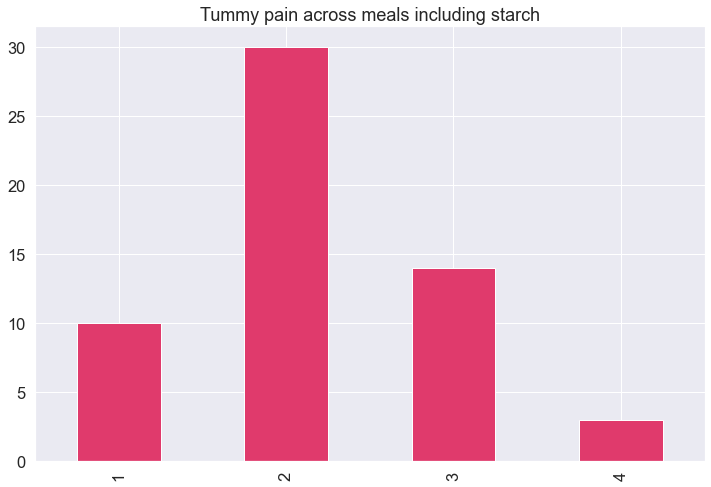

In [93]:
data[data['Starch - breads and grains'] == 1]['Stomach Pain'].value_counts().sort_index().plot(kind='bar', title='Tummy pain across meals including starch')

<AxesSubplot:title={'center':'Tummy pain across meals not including starch'}>

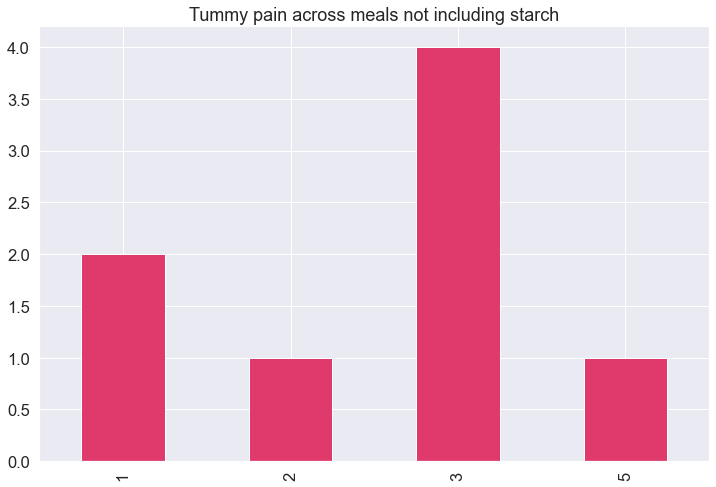

In [94]:
data[data['Starch - breads and grains'] == 0]['Stomach Pain'].value_counts().sort_index().plot(kind='bar', title='Tummy pain across meals not including starch')

My tummy pain seems to drop when I do eat starchy/gluteny foods. This lines up with the correlation plot again, but may just be a symptom of low sample size and oversimplicity of how the body works. I may be responding still to foods I ate in the previous meal, or snacks I had.

Let's try the same with Dairy though.

## Dairy sample size

In [96]:
# Computer, show me the data where my meal contained bread.
len(data[data['Dairy'] == 1])

33

I did actually manage to cut down on dairy quite a bit, this includes even the use of butter or milk in recipes, though half my meals did contain dairy so exclusion was rarely long lived.

<AxesSubplot:title={'center':'Tummy pain across meals including dairy'}>

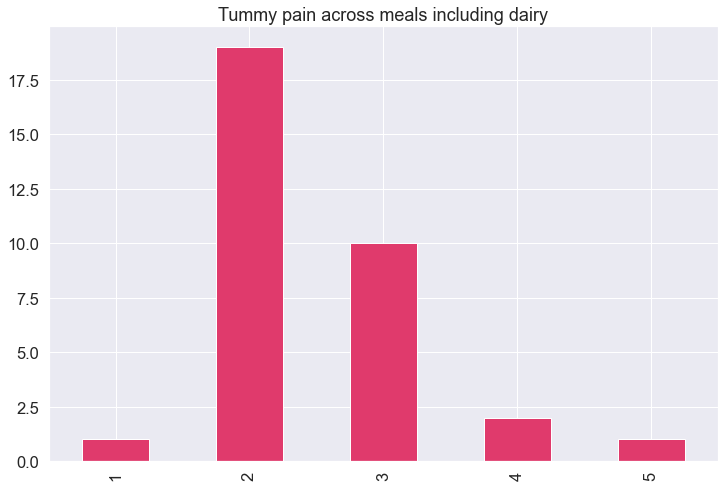

In [98]:
data[data['Dairy'] == 1]['Stomach Pain'].value_counts().sort_index().plot(kind='bar', title='Tummy pain across meals including dairy')

<AxesSubplot:title={'center':'Tummy pain across meals not including dairy'}>

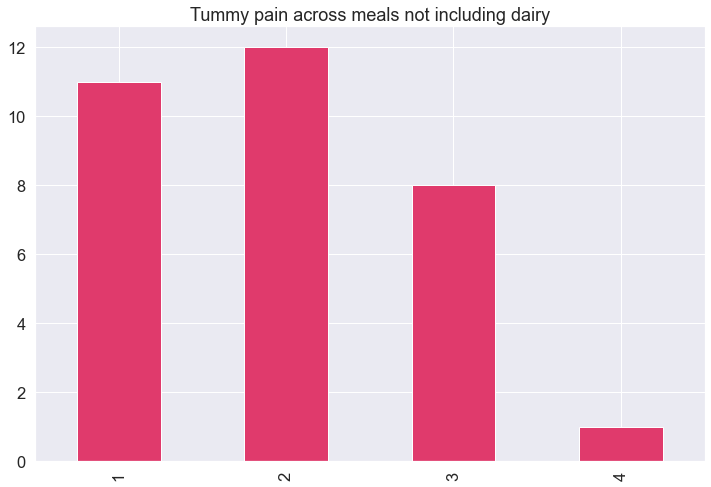

In [99]:
data[data['Dairy'] == 0]['Stomach Pain'].value_counts().sort_index().plot(kind='bar', title='Tummy pain across meals not including dairy')


The disbtribution here is roughly the same, my tummy seems to hurt on average. But when I eat dairy it's more likely to hurt a lot! And much less likely to not hurt at all.